## The code is to analysis the train speed data of two different datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
cur_dir = os.getcwd()
parent_dir = os.path.dirname(cur_dir)
data_dir = os.path.join(parent_dir, 'Data/alexnet/CombinedInfo')
data_dir

'/Users/dtjgp/Projects/GreenAI/PVWatts/Data/alexnet/CombinedInfo'

In [3]:
filepath_f = os.path.join(data_dir, 'TrainSpeed_f.csv')
filepath_c = os.path.join(data_dir, 'TrainSpeed_c.csv')

In [4]:
# Load data
TrainSpeed_f = pd.read_csv(filepath_f)
TrainSpeed_c = pd.read_csv(filepath_c)
print(TrainSpeed_f.head())
print('*'*50)
print(TrainSpeed_c.head())

             40            45            50            55            60  \
0  6.260767e+11  7.949616e+11  9.002390e+11  9.551770e+11  9.939142e+11   
1  6.207033e+11  7.941712e+11  9.037201e+11  9.591135e+11  9.975298e+11   
2  6.174983e+11  7.932371e+11  9.017055e+11  9.570855e+11  9.955317e+11   
3  6.124883e+11  7.895619e+11  8.995930e+11  9.573331e+11  9.940835e+11   
4  6.138065e+11  7.865831e+11  9.001703e+11  9.574863e+11  9.934367e+11   

             65            70            75            80            85  \
0  1.044713e+12  1.093338e+12  1.115470e+12  1.139037e+12  1.151578e+12   
1  1.048327e+12  1.095509e+12  1.121074e+12  1.129754e+12  1.154059e+12   
2  1.046313e+12  1.089642e+12  1.115481e+12  1.127663e+12  1.150827e+12   
3  1.043518e+12  1.084270e+12  1.111445e+12  1.128811e+12  1.149000e+12   
4  1.042629e+12  1.081235e+12  1.111173e+12  1.128578e+12  1.148349e+12   

             90            95  
0  1.172336e+12  1.182034e+12  
1  1.172974e+12  1.192859e+12  
2 

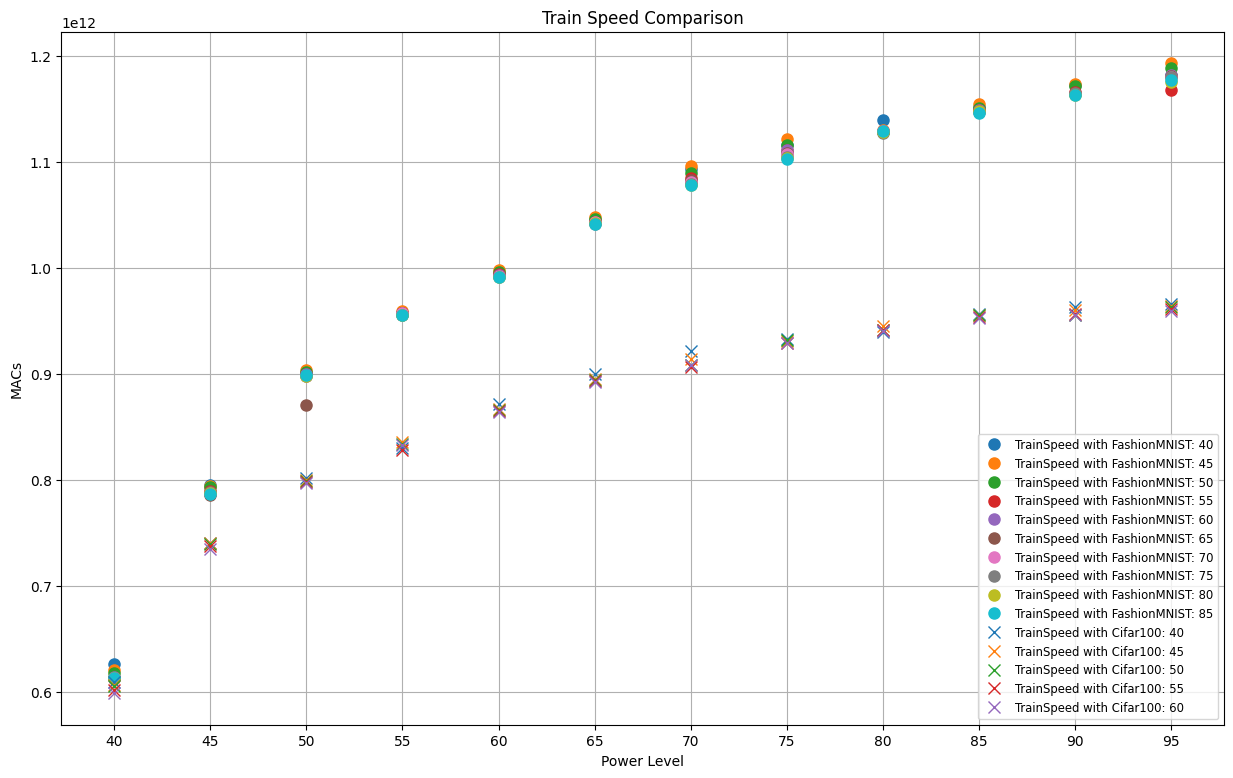

In [5]:
power_levels = [int(i) for i in TrainSpeed_f.columns.tolist()]

plt.figure(figsize=(15, 9))

# Plot TrainSpeed_f
for i in range(TrainSpeed_f.shape[0]):
    plt.plot(TrainSpeed_f.iloc[i, :], 'o', label='TrainSpeed with FashionMNIST: {}'.format(power_levels[i]), markersize=8)

# Plot TrainSpeed_c
for i in range(TrainSpeed_c.shape[0]):
    plt.plot(TrainSpeed_c.iloc[i, :], 'x', label='TrainSpeed with Cifar100: {}'.format(power_levels[i]), markersize=8)

plt.xlabel('Power Level')
plt.ylabel('MACs')
plt.title('Train Speed Comparison')
plt.legend(fontsize='small', loc='lower right')
plt.grid()
plt.show()

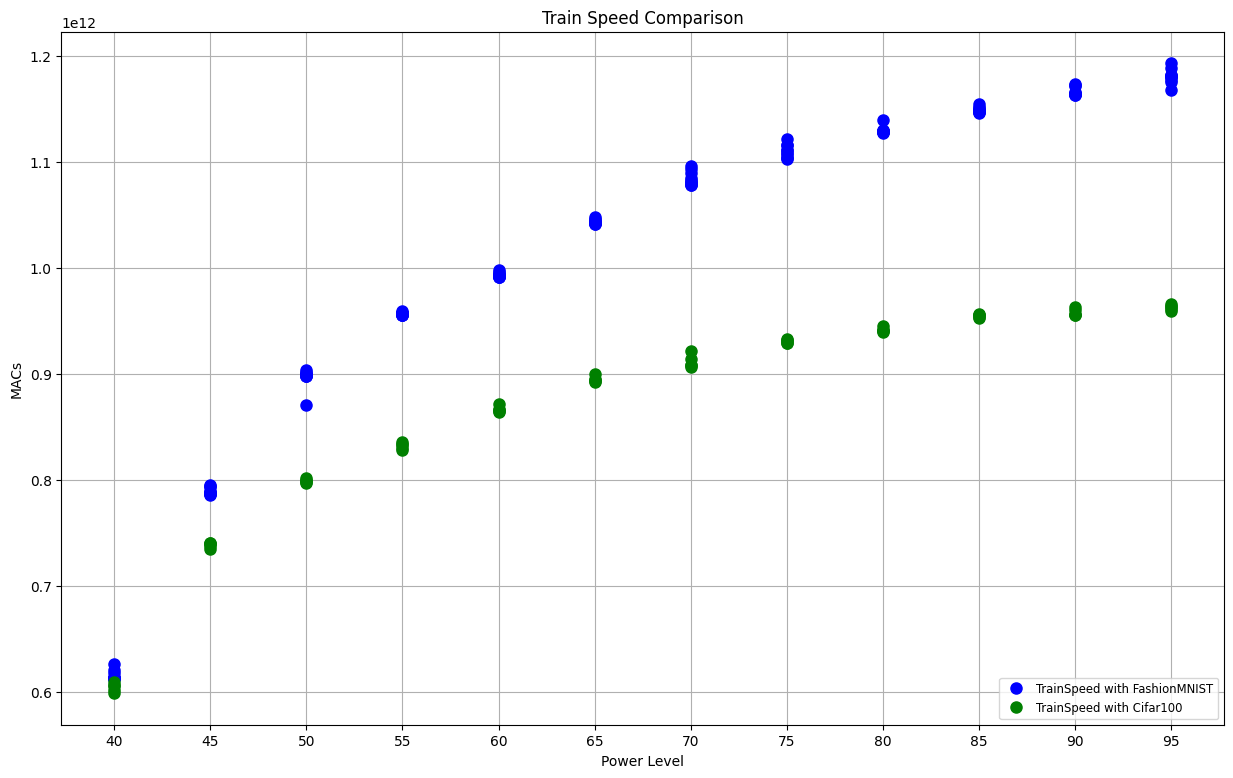

In [6]:
colors = ['blue', 'green']

plt.figure(figsize=(15, 9))

# Plot TrainSpeed_f
for i in range(TrainSpeed_f.shape[0]):
    plt.plot(TrainSpeed_f.iloc[i, :], 'o', color=colors[0], label='TrainSpeed with FashionMNIST' if i == 0 else "", markersize=8)

# Plot TrainSpeed_c
for i in range(TrainSpeed_c.shape[0]):
    plt.plot(TrainSpeed_c.iloc[i, :], 'o', color=colors[1], label='TrainSpeed with Cifar100' if i == 0 else "", markersize=8)

plt.xlabel('Power Level')
plt.ylabel('MACs')
plt.title('Train Speed Comparison')
plt.legend(fontsize='small', loc='lower right')
plt.grid()
plt.show()

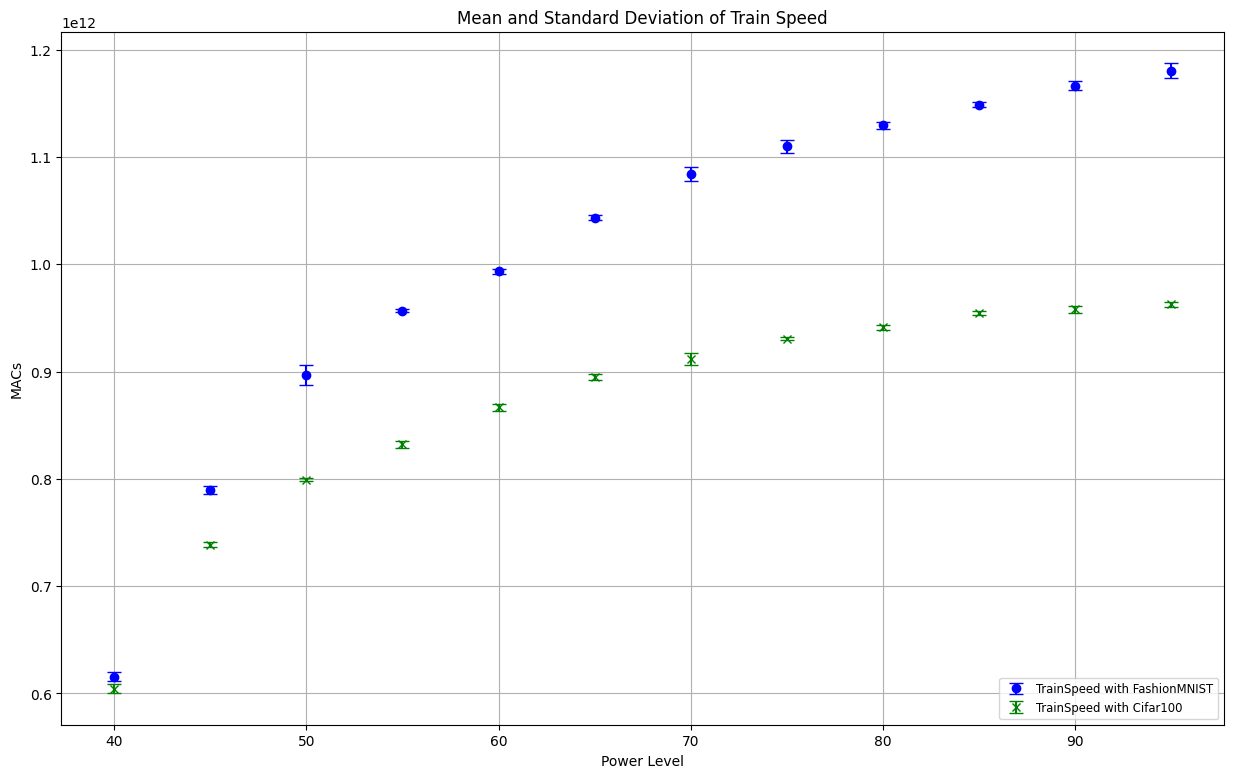

In [7]:
# Calculate mean and standard deviation
mean_f = TrainSpeed_f.mean(axis=0)
std_f = TrainSpeed_f.std(axis=0)
mean_c = TrainSpeed_c.mean(axis=0)
std_c = TrainSpeed_c.std(axis=0)

plt.figure(figsize=(15, 9))

# Plot mean and std for TrainSpeed_f
plt.errorbar(power_levels, mean_f, yerr=std_f, fmt='o', color='blue', label='TrainSpeed with FashionMNIST', capsize=5)

# Plot mean and std for TrainSpeed_c
plt.errorbar(power_levels, mean_c, yerr=std_c, fmt='x', color='green', label='TrainSpeed with Cifar100', capsize=5)

plt.xlabel('Power Level')
plt.ylabel('MACs')
plt.title('Mean and Standard Deviation of Train Speed')
plt.legend(fontsize='small', loc='lower right')
plt.grid()
plt.show()


In [10]:
# print(mean_f)
# print(std_f)
# print(mean_c)
# print(std_c)

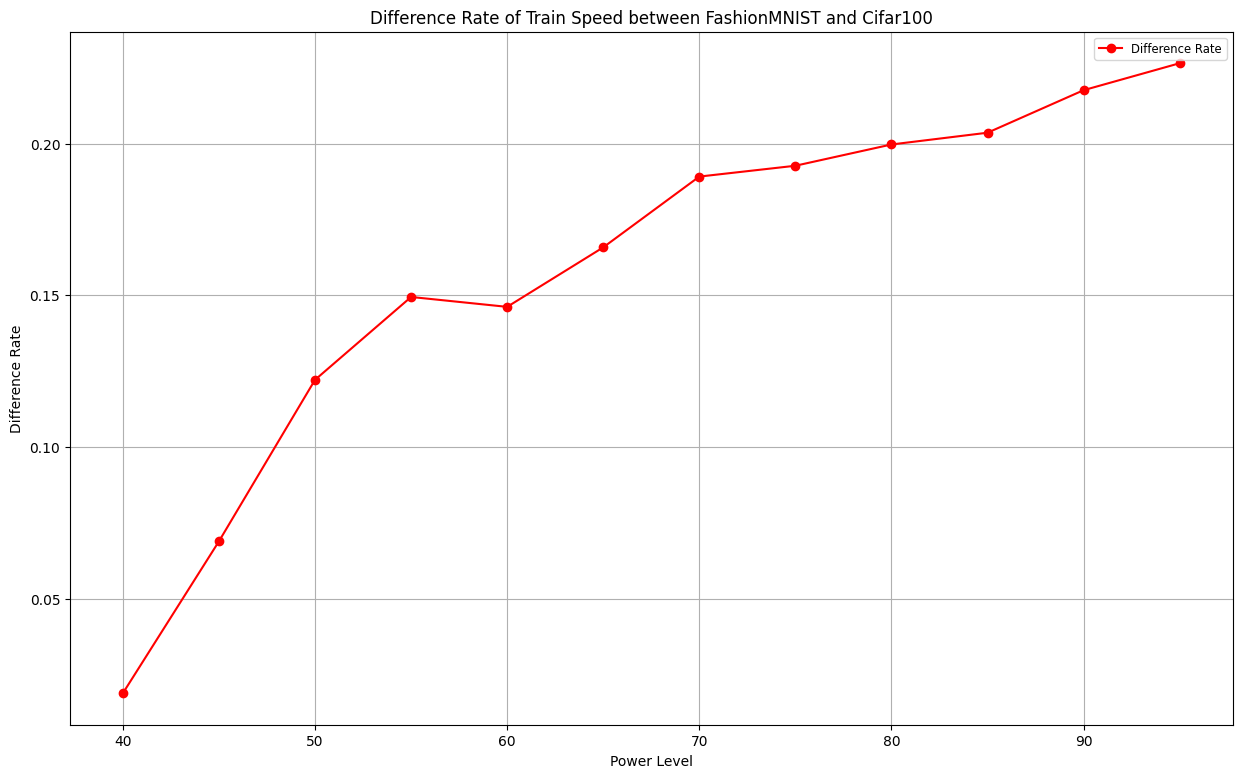

In [9]:
# Calculate the difference rate
difference_rate = (mean_f - mean_c) / mean_c
plt.figure(figsize=(15, 9))

plt.plot(power_levels, difference_rate, 'o-', color='red', label='Difference Rate')

plt.xlabel('Power Level')
plt.ylabel('Difference Rate')
plt.title('Difference Rate of Train Speed between FashionMNIST and Cifar100')
plt.legend(fontsize='small', loc='upper right')
plt.grid()
plt.show()